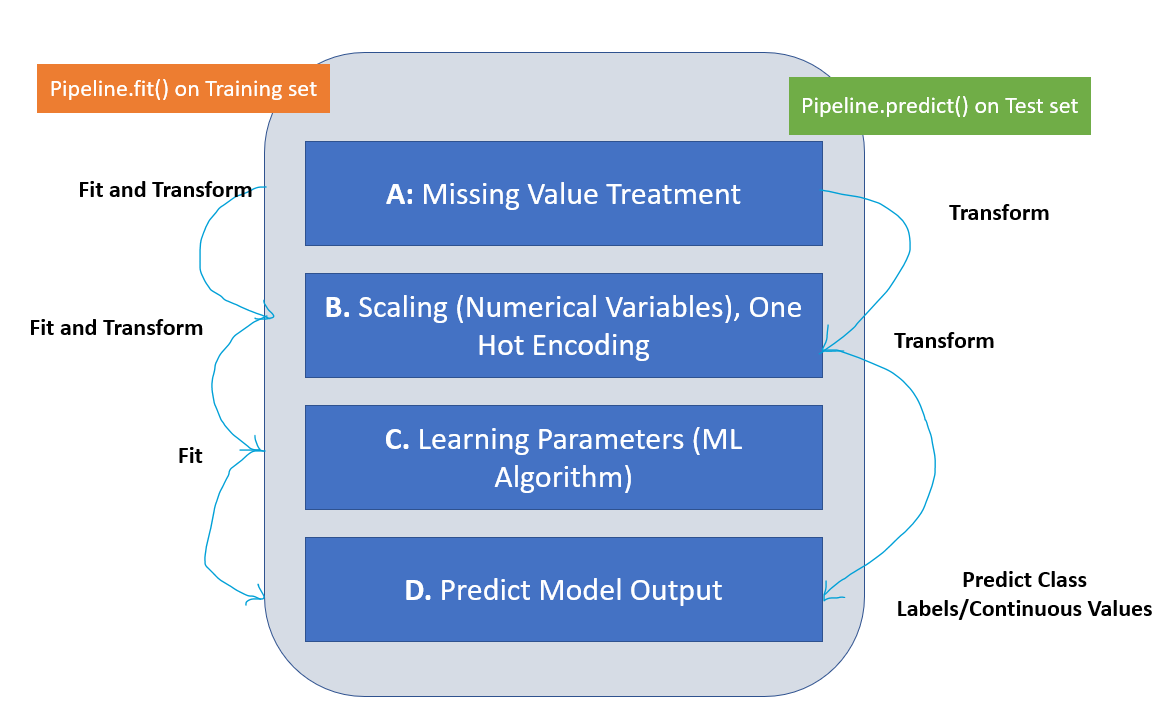

# Let's Plan
### Impute Missing Values > One Hot Encoding > Feature Selection(Best 5 columns selection) > Model 

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder

In [3]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
df.drop(columns=["who","adult_male","alive","alone","class","embark_town"], axis=1, inplace=True)

In [24]:
df.drop("deck", axis=1, inplace=True)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("survived",axis=1),df["survived"],test_size=0.2)

In [26]:
X_train.shape,y_train.shape

((712, 7), (712,))

In [27]:
y_train.sample(5)

93     0
384    0
40     0
161    1
168    0
Name: survived, dtype: int64

In [28]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked
647,1,male,56.0,0,0,35.5000,C
721,3,male,17.0,1,0,7.0542,S
750,2,female,4.0,1,1,23.0000,S
712,1,male,48.0,1,0,52.0000,S
699,3,male,42.0,0,0,7.6500,S


In [10]:
# Imputation TRansformer

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, chi2

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
trf1 = ColumnTransformer([
    ("Impute Age", SimpleImputer(),[2]), # Default SimpleImputer Strategyu is mean, [2] is index of columns, index is used as the result is numpy array so it would be easy to handle
    ("impute_embarked", SimpleImputer(strategy="most_frequent"),[6])
],remainder='passthrough') 
#accept list of tuples 

In [30]:
#One Hot Encoding
trf2 = ColumnTransformer([
    ('OHE_SEX_Embarked', OneHotEncoder(sparse=False, handle_unknown='ignore'),[1,6])
],remainder='passthrough')

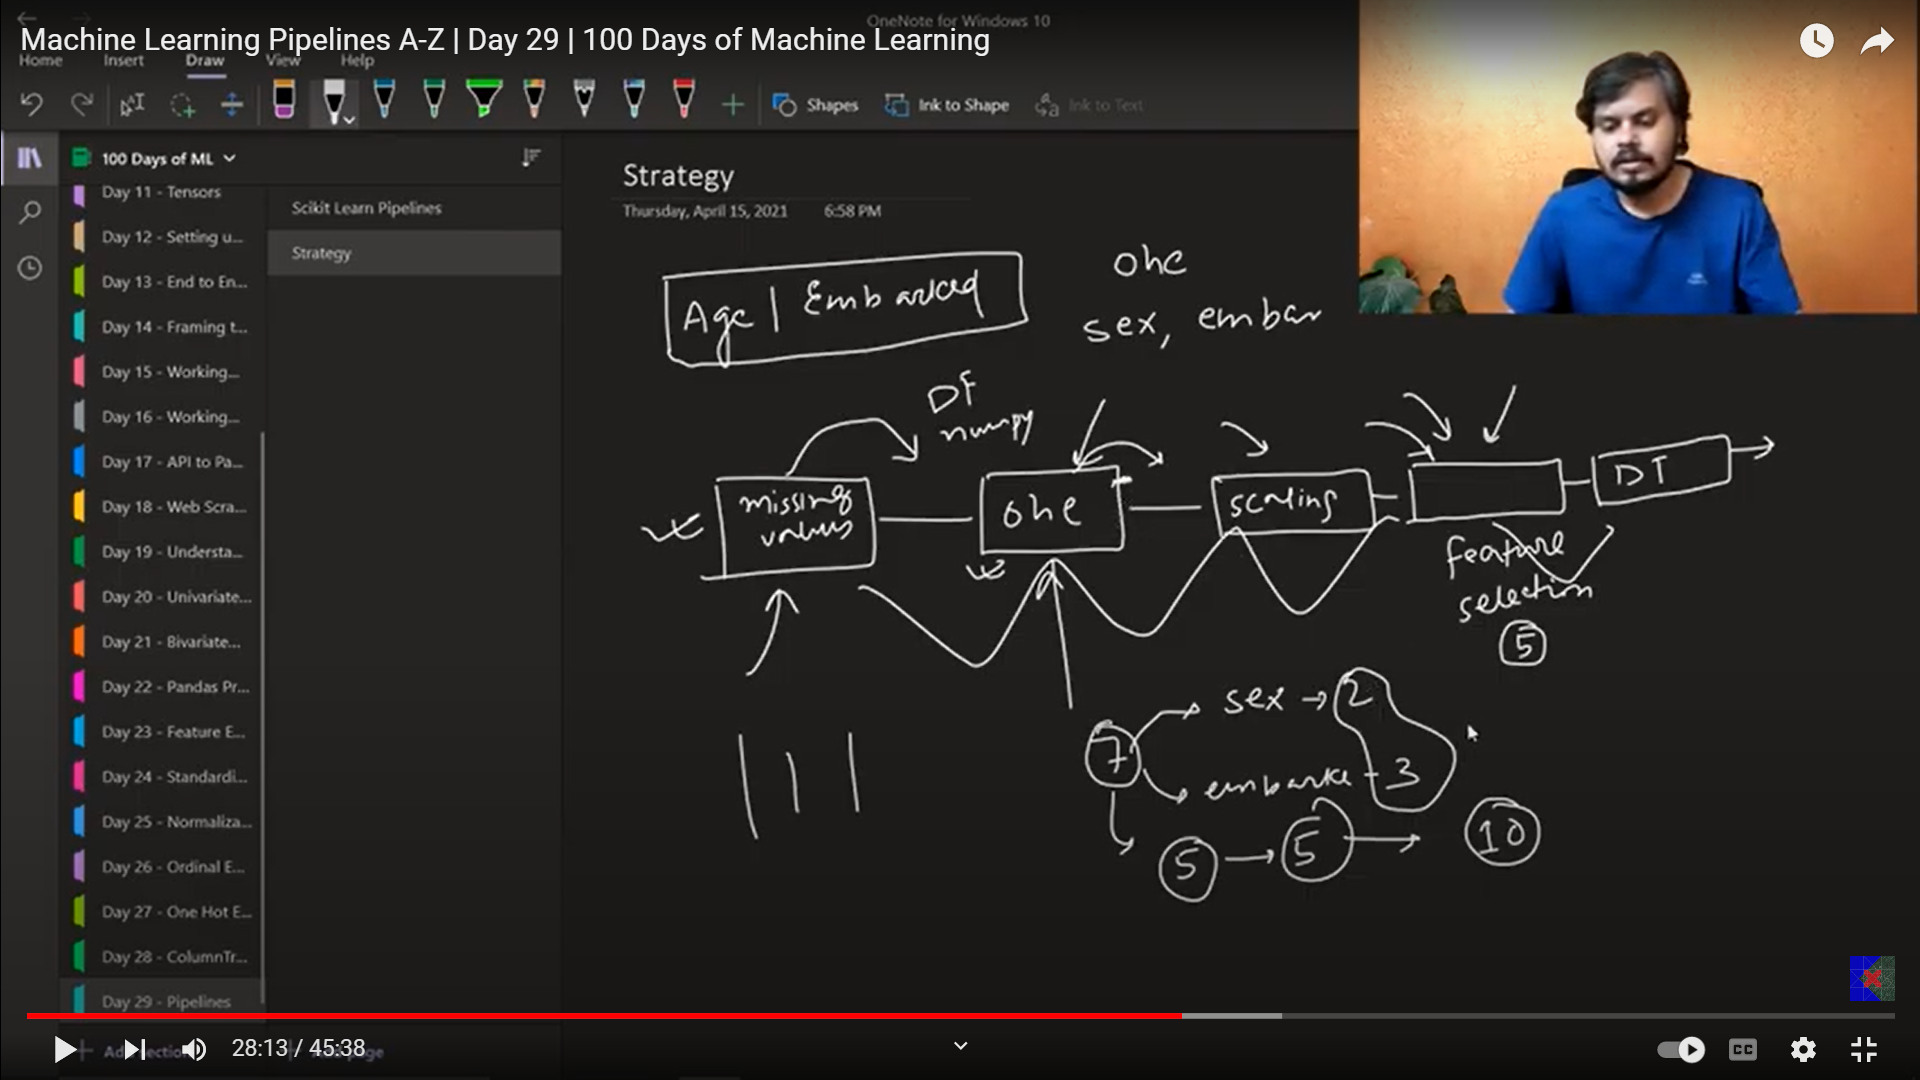

In [31]:
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10)) #0-10 columns
])

In [33]:
trf4 = SelectKBest(score_func=chi2, k=8) #select 8 best

In [34]:
trf5= DecisionTreeClassifier()

# Create Pipeline

In [41]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

# Pipeline Vs make_pipleine
###### Pipeline requires naming of steps, make_pipleine don't
###### (Same applies to ColumnTransformer and make_column_transformer)

In [36]:
# Alternate Syntax
pipe = make_pipeline(trf1,trf2,trf3,trf4,trf5)

In [42]:
#Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [43]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Impute Age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE_SEX_Embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x00000190AD63EDC0>)),
                ('trf5', DecisionTreeClassifier())])

# Explore Pipeline

In [44]:
pipe.classes_

array([0, 1], dtype=int64)

In [45]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('Impute Age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('OHE_SEX_Embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'trf4': SelectKBest(k=8, score_func=<function chi2 at 0x00000190AD63EDC0>),
 'trf5': DecisionTreeClassifier()}

In [47]:
pipe.named_steps["trf1"]

ColumnTransformer(remainder='passthrough',
                  transformers=[('Impute Age', SimpleImputer(), [2]),
                                ('impute_embarked',
                                 SimpleImputer(strategy='most_frequent'),
                                 [6])])

In [48]:
pipe.named_steps["trf1"].transformers_

[('Impute Age', SimpleImputer(), [2]),
 ('impute_embarked', SimpleImputer(strategy='most_frequent'), [6]),
 ('remainder', 'passthrough', [0, 1, 3, 4, 5])]

In [50]:
pipe.named_steps["trf1"].transformers_[0]

('Impute Age', SimpleImputer(), [2])

In [51]:
pipe.named_steps["trf1"].transformers_[0][1]

SimpleImputer()

In [54]:
pipe.named_steps["trf1"].transformers_[0][1].statistics_

array([30.09382867])

In [58]:
pipe.named_steps["trf1"].transformers_

[('Impute Age', SimpleImputer(), [2]),
 ('impute_embarked', SimpleImputer(strategy='most_frequent'), [6]),
 ('remainder', 'passthrough', [0, 1, 3, 4, 5])]

In [60]:
pipe.named_steps["trf1"].transformers_[1][1]

SimpleImputer(strategy='most_frequent')

In [59]:
pipe.named_steps["trf1"].transformers_[1][1].statistics_

array(['S'], dtype=object)

# Prediction

In [68]:
#predict - No transformation required

y_predict = pipe.predict(X_test)

In [62]:
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [65]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_test, y_predict)
score

0.6759776536312849

In [67]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       119
           1       0.54      0.22      0.31        60

    accuracy                           0.68       179
   macro avg       0.62      0.56      0.55       179
weighted avg       0.64      0.68      0.63       179



# Cross Validation Using Pipeline

In [69]:
# using Cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy")

array([0.59440559, 0.62237762, 0.67605634, 0.64084507, 0.59859155])

In [70]:
cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy").mean()

0.626455234905939

# GridSearch Using Pipeline

In [81]:
params ={
    'trf5__max_depth':[1,2,3,4,5,10,None]
}

In [82]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, params, cv=5, scoring="accuracy")

grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Impute '
                                                                         'Age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE_SEX_Embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x00000190AD63EDC0>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, 10, None]},
             scoring='accuracy')

In [83]:
grid.best_score_

0.626455234905939

In [84]:
grid.best_params_

{'trf5__max_depth': 5}

# Exporting The Pipeline

In [85]:
import pickle as pkl
pkl.dump(pipe, open("pipe.pkl", "wb"))

# Importing and Prediction

In [86]:
pipe2 = pkl.load(open("pipe.pkl","rb"))
pipe2

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Impute Age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE_SEX_Embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x00000190AD63EDC0>)),
                ('trf5', DecisionTreeClassifier())])

In [88]:
import numpy as np

In [91]:
test_input2=np.array([2,"female",32.0,0,0,15.2,"S"])

In [96]:
print(test_input2.shape)
test_input2= test_input2.reshape(1,7)
print(test_input2.shape)

(7,)
(1, 7)


In [97]:
pipe.predict(test_input2)

ValueError: SimpleImputer does not support data with dtype <U32. Please provide either a numeric array (with a floating point or integer dtype) or categorical data represented either as an array with integer dtype or an array of string values with an object dtype.

In [98]:
test_input2=np.array([2,"female",32.0,0,0,15.2,"S"], dtype=object).reshape(1,7)

In [99]:
pipe.predict(test_input2)

array([0], dtype=int64)